In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [4]:
csvpath='merged_file.csv'
election=pd.read_csv(csvpath)
election.head()

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Bachelors),Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,0.739474,34813.0,...,2311.0,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,0.574818,365565.0,...,42160.0,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,0.637161,80203.0,...,9685.0,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0
3,3,Indiana,IN,Benton County,860,2579,3654,0.235359,0.705802,8709.0,...,753.0,188.0,42.0,12.0,48069.0,23181.0,81500.0,4368.0,2364.0,201.0
4,4,Indiana,IN,Blackford County,1243,3349,4822,0.257777,0.694525,12364.0,...,546.0,315.0,51.0,42.0,38791.0,21980.0,67100.0,5763.0,4263.0,480.0


In [7]:
a=0
b=0
def LinearRegression(x,y):
    # Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
    #Calculate the linear regression values to be plotted against weight
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot the regression values to form the regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red");
    
    print(f"The r-squared is: {rvalue}")
    print(line_eq)

In [29]:
a=election["Total Population"].astype(float)
z=a.tolist()
pop_reduced=[]
for item in z:
    b=item/500
    pop_reduced.append(b)

The r-squared is: -0.6858586589534694
y = -0.0x + 0.7


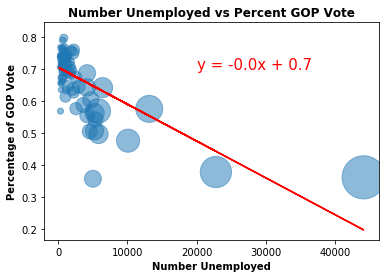

In [30]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(election["Unemployed"],election["GOP %"],s=pop_reduced*10000, alpha=0.5);
plt.xlabel("Number Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Number Unemployed vs Percent GOP Vote",weight="bold");

a=20000
b=0.7
LinearRegression(election["Unemployed"],election["GOP %"])

In [12]:
unemployment=pd.DataFrame({"County":election["County"],"Total Population":election["Total Population"],
                           "Unemployed":election["Unemployed"],"GOP %":election["GOP %"]})

In [50]:
unemployment["% Unemployment"]=(election["Unemployed"]/(election["Pop in Labor Force"]+election["Unemployed"]))*100

In [51]:
unemployment.head()

,County,Total Population,Unemployed,GOP %,% Unemployment
0,Adams County,34813.0,872.0,0.739474,5.175996
1,Allen County,365565.0,13152.0,0.574818,6.580672
2,Bartholomew County,80203.0,2165.0,0.637161,4.934473
3,Benton County,8709.0,201.0,0.705802,4.399212
4,Blackford County,12364.0,480.0,0.694525,7.688611


The r-squared is: -0.2719785036326959
y = -0.02x + 0.79


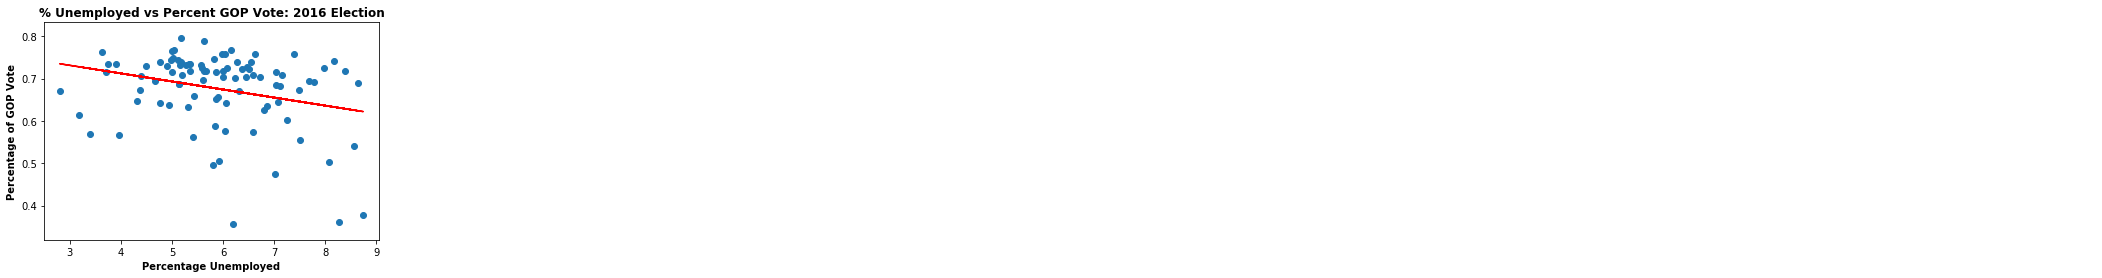

<Figure size 1440x2880 with 0 Axes>

In [52]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(unemployment["% Unemployment"],unemployment["GOP %"],marker="o");
plt.xlabel("Percentage Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("% Unemployed vs Percent GOP Vote: 2016 Election",weight="bold");

a=40
b=0.5
LinearRegression(unemployment["% Unemployment"],unemployment["GOP %"])

plt.figure(figsize=(20,40));


The r-squared is: -0.2719785036326959
y = -0.02x + 0.79


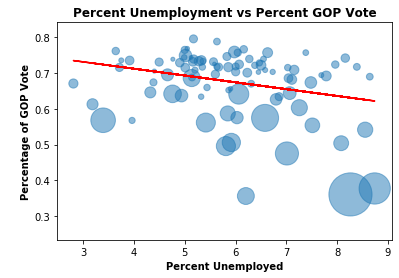

In [53]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(unemployment["% Unemployment"],unemployment["GOP %"],s=pop_reduced*10000, alpha=0.5);
plt.xlabel("Percent Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Percent Unemployment vs Percent GOP Vote",weight="bold");

a=1.5
b=0.4
LinearRegression(unemployment["% Unemployment"],unemployment["GOP %"])
plt.annotate(f"R-squared = -0.344",(1.5,0.35),fontsize=15,color='red');

The r-squared is: 0.256101423289009
y = 23951.16x + -69863.17


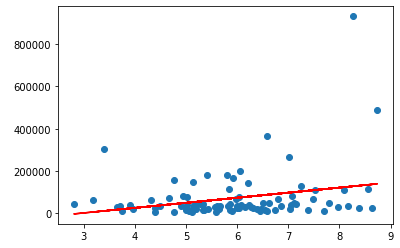

In [54]:
plt.scatter(unemployment["% Unemployment"],unemployment["Total Population"]);#,s=pop_reduced*10000, alpha=0.5);
a=1.5
b=600000
LinearRegression(unemployment["% Unemployment"],unemployment["Total Population"])
plt.annotate(f"R-squared = 0.357",(1.5,500000),fontsize=15,color='red');